Hitesh                                                  \
Enrollment Number: A023119820027                        \
Programme: B.Tech AI                                    \
Branch: Artificial Intelligence                         \
Batch: 2020 - 2024                                      \
Semester: 7                                             \
Section: 7AI 1                                          \
Email id: hiteshb3004@gmail.com                         \

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Hitesh TSA (CSE471) LAB Work/DATASETs/LAB 8/webtraffic (2).csv')

In [ ]:
data.shape

(4896, 2)

In [ ]:
data.head()

,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sessions = data['Sessions']

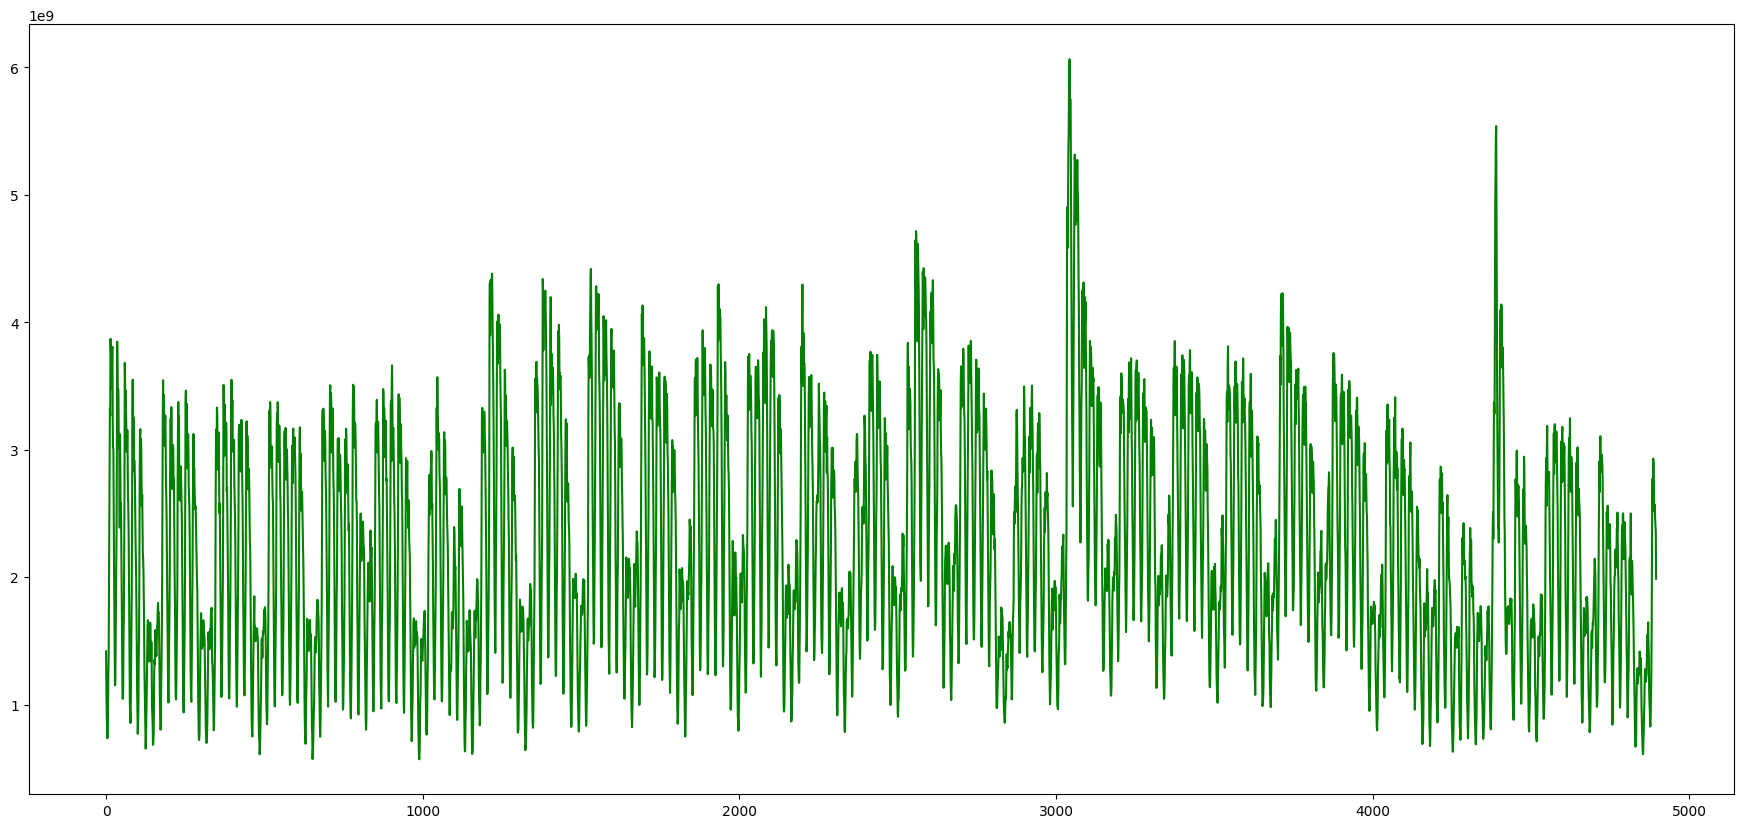

In [ ]:
ar = np.arange(len(sessions))
plt.figure(figsize=(22,10))
plt.plot(ar, sessions,'g')
plt.show()

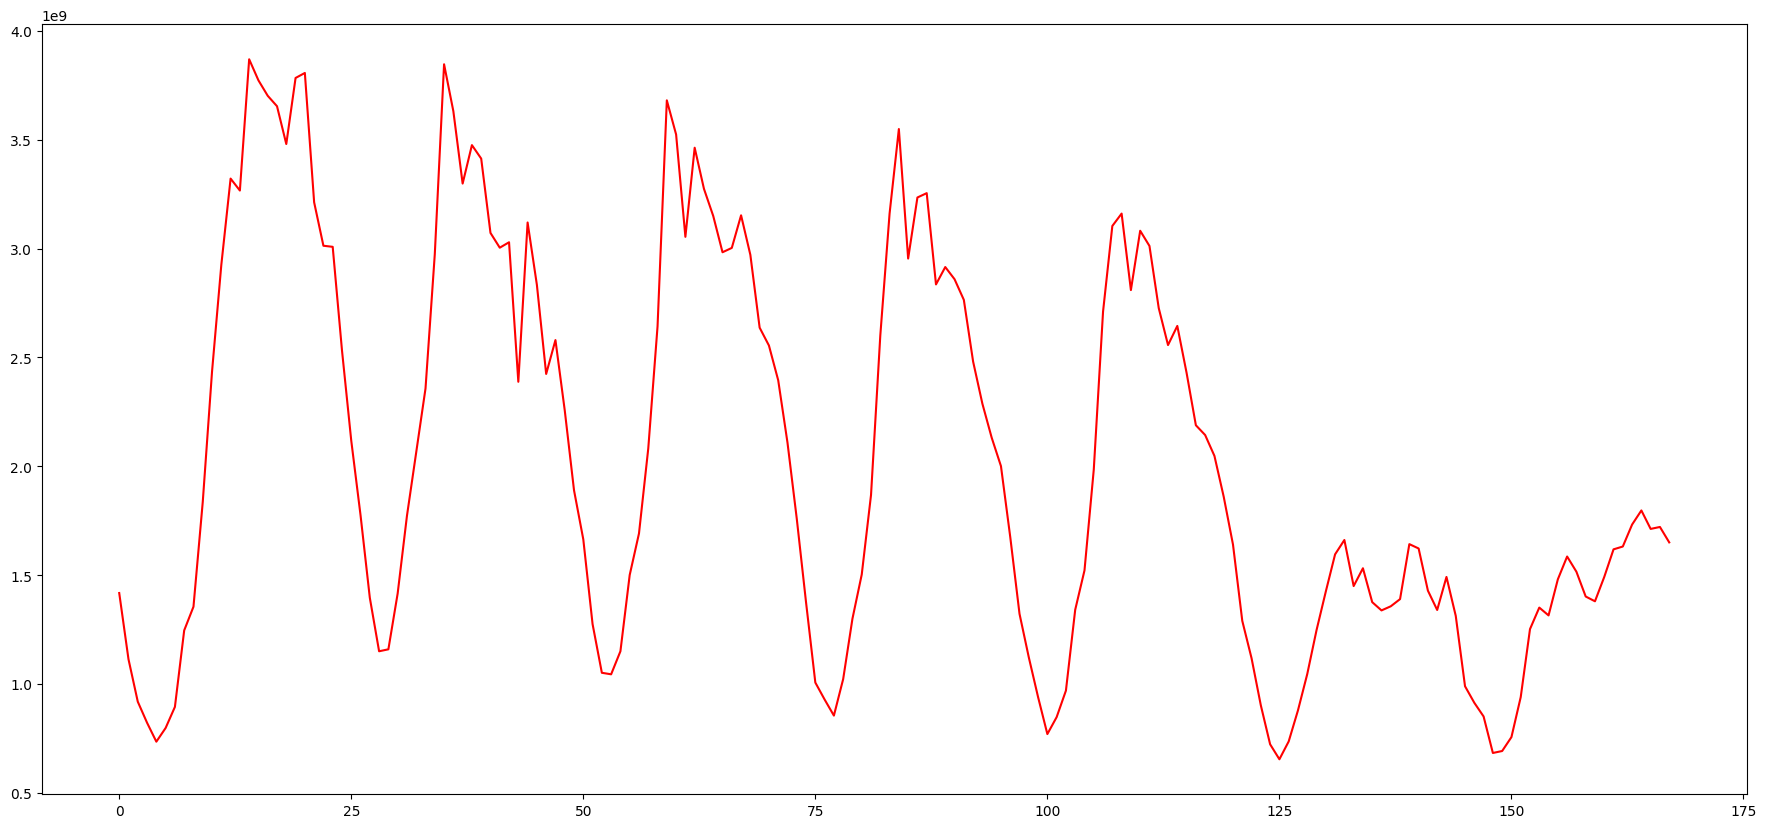

In [ ]:
#first week web traffic
sample = sessions[:168]
ar = np.arange(len(sample))
plt.figure(figsize=(22,10))
plt.plot(ar, sample,'r')
plt.show()

In [ ]:
def prepare_data(seq,num):
  x=[]
  y=[]
  for i in range(0,(len(seq)-num),1):

    input_ = seq[i:i+num]
    output  = seq[i+num]

    x.append(input_)
    y.append(output)

  return np.array(x), np.array(y)

In [ ]:
num=168
x,y= prepare_data(sessions,num)
print(len(x))

4728


In [ ]:
ind = int(0.9 * len(x))
x_tr = x[:ind]
y_tr = y[:ind]
x_val=x[ind:]
y_val=y[ind:]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#normalize the inputs
x_scaler= StandardScaler()
x_tr = x_scaler.fit_transform(x_tr)
x_val= x_scaler.transform(x_val)
#reshaping the output for normalization
y_tr=y_tr.reshape(len(y_tr),1)
y_val=y_val.reshape(len(y_val),1)
#normalize the output
y_scaler=StandardScaler()
y_tr = y_scaler.fit_transform(y_tr)[:,0]
y_val = y_scaler.transform(y_val)[:,0]


In [ ]:
#reshaping input data
x_tr= x_tr.reshape(x_tr.shape[0],x_tr.shape[1],1)
x_val= x_val.reshape(x_val.shape[0],x_val.shape[1],1)
print(x_tr.shape)

(4255, 168, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import *

In [ ]:
model= Sequential()
model.add(Conv1D(64, 3, padding='same', activation='relu',input_shape=(num,1)))
model.add(Conv1D(32, 5, padding='same', activation='relu',input_shape=(num,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 168, 64)           256       
                                                                 
 conv1d_3 (Conv1D)           (None, 168, 32)           10272     
                                                                 
 flatten_1 (Flatten)         (None, 5376)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                344128    
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 354721 (1.35 MB)
Trainable params: 354721 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Define the optimizer and loss:
model.compile(loss='mse',optimizer='adam')
# Define the callback to save the best model during the training
mc = ModelCheckpoint('best_model.hdf5', monitor='val_loss', verbose=1,
         save_best_only=True, mode='min')

In [ ]:
# Train the model for 30 epochs with batch size of 32:
history=model.fit(x_tr, y_tr ,epochs=30, batch_size=32, validation_data=(x_val,y_val),
            callbacks=[mc])

Epoch 1/30
131/133 [============================>.] - ETA: 0s - loss: 0.0867
Epoch 1: val_loss improved from inf to 0.03510, saving model to best_model.hdf5
133/133 [==============================] - 2s 14ms/step - loss: 0.0857 - val_loss: 0.0351
Epoch 2/30
 10/133 [=>............................] - ETA: 1s - loss: 0.0302

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/133 [============================>.] - ETA: 0s - loss: 0.0254
Epoch 2: val_loss improved from 0.03510 to 0.02028, saving model to best_model.hdf5
133/133 [==============================] - 2s 12ms/step - loss: 0.0252 - val_loss: 0.0203
Epoch 3/30
130/133 [============================>.] - ETA: 0s - loss: 0.0169
Epoch 3: val_loss improved from 0.02028 to 0.01930, saving model to best_model.hdf5
133/133 [==============================] - 2s 12ms/step - loss: 0.0171 - val_loss: 0.0193
Epoch 4/30
131/133 [============================>.] - ETA: 0s - loss: 0.0147
Epoch 4: val_loss improved from 0.01930 to 0.01536, saving model to best_model.hdf5
133/133 [==============================] - 2s 15ms/step - loss: 0.0147 - val_loss: 0.0154
Epoch 5/30
131/133 [============================>.] - ETA: 0s - loss: 0.0139
Epoch 5: val_loss did not improve from 0.01536
133/133 [==============================] - 2s 17ms/step - loss: 0.0139 - val_loss: 0.0158
Epoch 6/30
132/133 [========================

In [ ]:
model.load_weights('best_model.hdf5')

In [ ]:
mse = model.evaluate(x_val,y_val)
print("Mean Square Error:",mse)

15/15 [==============================] - 0s 5ms/step - loss: 0.0134
Mean Square Error: 0.013408123515546322


In [ ]:
def forecast(x_val, no_of_pred, ind):
  predictions=[]
  #intialize the array with previous weeks data
  temp=x_val[ind]
  for i in range(no_of_pred):
    #predict for the next hour
    pred=model.predict(temp.reshape(1,-1,1))[0][0]

    #append the prediction as the last element of array
    temp = np.insert(temp,len(temp),pred)
    predictions.append(pred)
    #ignore the first element of array
    temp = temp[1:]
  return predictions

In [ ]:
no_of_pred =24
ind=72
y_pred = forecast(x_val,no_of_pred,ind)
y_true = y_val[ind:ind+(no_of_pred)]

1/1 [==============================] - 0s 15ms/step


In [ ]:
type(y_pred)

list

In [ ]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [ ]:
# y_true= y_scaler.inverse_transform(y_true)
# y_pred= y_scaler.inverse_transform(y_pred)

y_true = y_true.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

In [ ]:
def plot(y_true,y_pred):
  ar = np.arange(len(y_true))
  plt.figure(figsize=(22,10))
  plt.plot(ar, y_true,'r')
  plt.plot(ar, y_pred,'y')
  plt.show()

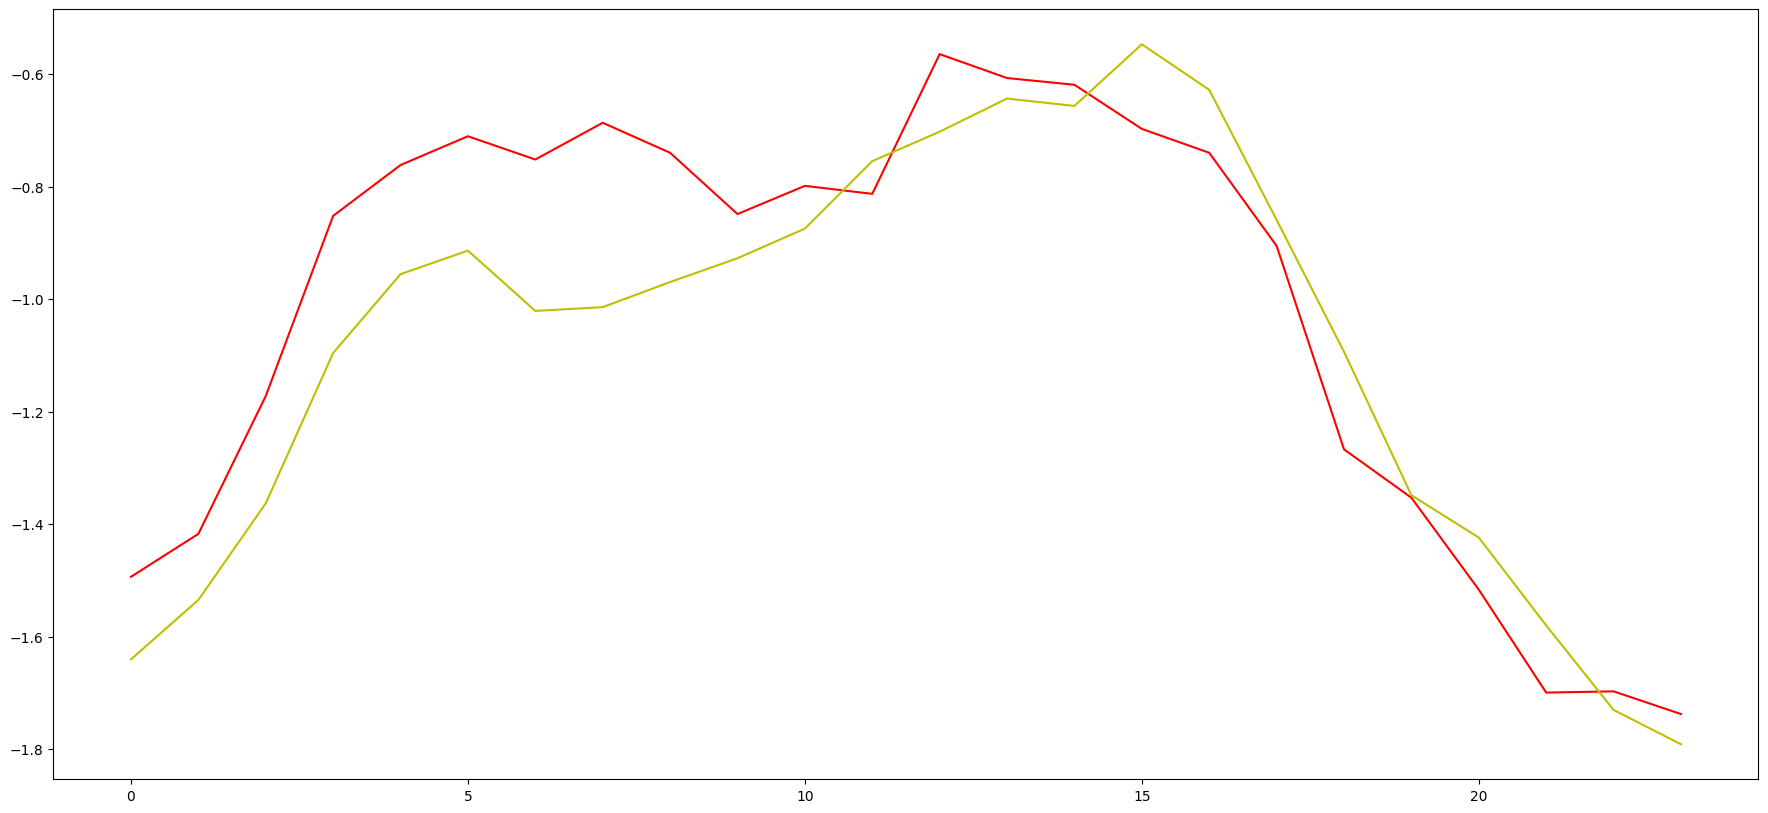

In [ ]:
plot(y_true, y_pred)